# Interactive Visualization

---

This is an interactive visualization built for an assignment. Opened in Jupyter Notebook, the bar chart can respond to clicks by users and change colors according to the chosen y coordinate.

Reference: 
1. Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
2. In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
import scipy.stats as st

In [3]:
year_mean = df.apply(np.mean, axis = 1)
year_sd = df.apply(np.std, axis = 1)
err = pd.Series(1.96 * year_sd/np.sqrt(len(df.loc[1992])-1))

data = pd.DataFrame({'mean' : year_mean, 'sd' : year_sd, 'error' : err})
data = data[['mean', 'sd', 'error']]
data

,mean,sd,error
1992,33312.107476,200603.415985,6508.897970
1993,41861.859541,98384.876053,3192.254314
1994,39493.304941,140350.695166,4553.902287
1995,47743.550969,69771.625748,2263.851744


### To calculate t-interval, can use the below:

st.t.interval(0.95, len(df.loc[1992])-1, loc=year_mean, scale=year_sd/np.sqrt(len(df.loc[1992])-1))

# Plotting the Barchart

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


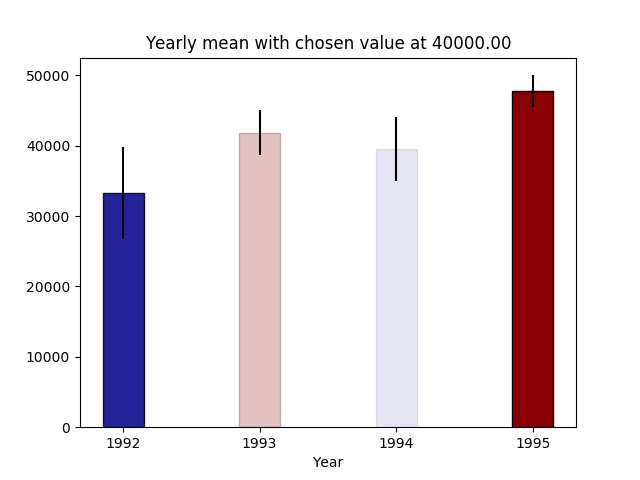

In [5]:
initial_value = 40000


fig = plt.figure()

def plotting(chosen_value):
    
    max_diff = max(abs(data['mean']-chosen_value))
    
    year = ['1992','1993','1994','1995']
    barlist = plt.bar(range(len(year)),data['mean'], width = 0.3, yerr = err)

    plt.gca().set_xlabel('year')
    plt.xticks(range(len(year)), year)

    for i in range(len(barlist)):
        
        diff = abs(data.iloc[i,0] - chosen_value)
        alpha_ratio = max(0.1,diff/max_diff)
        
        #adjusting alpha according to distance between mean and max diff
        if data.iloc[i,0] > chosen_value:
            barlist[i].set_facecolor('darkred')
            barlist[i].set_alpha(alpha_ratio)
            barlist[i].set_edgecolor('black')

        if data.iloc[i,0] < chosen_value:
            barlist[i].set_color('darkblue')
            barlist[i].set_alpha(alpha_ratio)  
            barlist[i].set_edgecolor('black')


    plt.gca().set_title('Yearly mean with chosen value at {:.2f}'.format(chosen_value))
    plt.gca().set_xlabel('Year')
    

def onclick(event):
    plt.cla()
    plotting(event.ydata)
   

plotting(initial_value)    
plt.gcf().canvas.mpl_connect('button_press_event', onclick);